In [4]:
#modelos de regresion lineal 
#modelos con datos simulados
#y=a+b*x
#x:100 valores distribuidos segun una N(1.5 media,2.5 desviacion)
#Ye=5 + 1.9*x + e
#e estara distribuida segun una N(0,0.8)

In [5]:
import pandas as pd
import numpy as np

In [6]:
x=1.5+2.5*np.random.randn(100)

In [7]:
res=0+0.8*np.random.randn(100)

In [8]:
y_pred=5+1.9*x

In [9]:
y_act=5+1.9*x+res

In [10]:
x_list=x.tolist()
y_pred_list=y_pred.tolist()
y_act_list=y_act.tolist()

In [11]:
data=pd.DataFrame(
    {
        "x":x_list,
        "y":y_act,
        "y_pred":y_pred
    }
)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

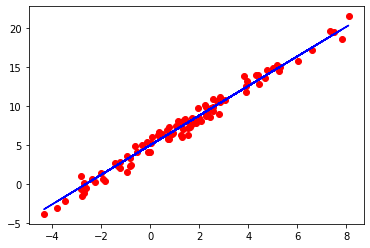

In [14]:
plt.plot(data["x"],data["y"],"ro")
plt.plot(data["x"],data["y_pred"],"b")

In [15]:
data["SSR"]=(data["y_pred"]-np.mean(data["y"]))**2 #suma de cuadrados de los resultados
data["SSD"]=(data["y_pred"]-data["y"])**2 #suma de cuadrados totales
data["SST"]=(data["y"]-np.mean(data["y"]))**2 #suma de cuadrados las diferencias 

In [16]:
data.head()

,x,y,y_pred,SSR,SSD,SST
0,0.033110,5.337044,5.062909,5.450151,0.075150,4.245332
1,5.257613,14.548204,14.989465,57.638473,0.194711,51.133079
2,-2.780953,-1.584045,-0.283811,59.002001,1.690608,80.667521
3,2.256453,8.806038,9.287260,3.571326,0.231575,1.984079
4,1.247488,8.007735,7.370227,0.000742,0.406417,0.372430


In [17]:
SSR=sum(data["SSR"])
SST=sum(data["SST"])
SSD=sum(data["SSD"])

In [18]:
SSR

2566.9367947794717

In [19]:
SSD

53.192642814131986

In [20]:
SST

2748.8827519840333

In [21]:
R2=SSR/SST
print(R2)

0.933810942982839


(array([ 2.,  4., 13., 15., 13., 12., 21.,  9.,  8.,  3.]),
 array([-1.66397537, -1.33316526, -1.00235516, -0.67154506, -0.34073495,
        -0.00992485,  0.32088526,  0.65169536,  0.98250546,  1.31331557,
         1.64412567]),
 <BarContainer object of 10 artists>)

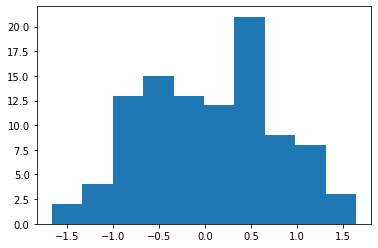

In [22]:
plt.hist((data["y_pred"]-data["y"]))

In [23]:
#obteniendo la recta de regresion
x_mean=np.mean(data["x"])
y_mean=np.mean(data["y"])
x_mean, y_mean

(1.2916261474396589, 7.39746458405831)

In [25]:
data["Beta_n"]=(data["x"]-x_mean)*(data["y"]-y_mean)
data["Beta_d"]=(data["x"]-x_mean)**2

In [27]:
beta=sum(data["Beta_n"])/sum(data["Beta_d"])

In [28]:
alpha=y_mean-beta*x_mean

In [29]:
alpha, beta

(4.881514087897702, 1.9478937470783486)

In [30]:
#el modelo es y=4.881514087897702+1.9478937470783486*x

In [31]:
data["y_model"]=alpha+beta*data["x"]

In [32]:
data["SSR"]=(data["y_model"]-y_mean)**2 
data["SSD"]=(data["y_model"]-data["y"])**2
data["SST"]=(data["y"]-y_mean)**2

In [33]:
SSR, SSD, SST 

(2566.9367947794717, 53.192642814131986, 2748.8827519840333)

In [34]:
R2=SSR/SST

In [35]:
R2

0.933810942982839

In [36]:
# el error estandar residual
# la desviacion estandar del termino del error
# para regresion lienal simple RSE=sqrt(SSD/n-2) donde n es el numero de datos
# para regresion multiple RSE=sqrt(SSD/n-k-1) donde k es el numero de variables predictoras

In [37]:
RSE=np.sqrt(SSD/(len(data["x"])-2))

In [39]:
RSE #entre menor sea el valor mejor

0.7367374495245637

In [42]:
E=RSE/y_mean #calcular el error

In [43]:
E*100 #porcentaje del error

9.95932378118103